# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Import API key
from api_keys import api_key

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "imperial", "appid": api_key}
weather_list = []
print("Beginning Data Retrieval")
print("-----------------------------")

record_id = 0
set_id = 1

for city in cities:  
    
    if record_id<49:
        record_id += 1
    else: 
        record_id = 0
        set_id += 1
    
    print(f"Processing Record {record_id} of Set {set_id} | {city}.")
    
    try:
        current_weather_city = owm.get_current(city, **settings)  
        weather_list.append(current_weather_city)
    except:
        print("City not found. Skipping...")
        pass
    
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ha tinh.
Processing Record 2 of Set 1 | geraldton.
Processing Record 3 of Set 1 | cabo san lucas.
Processing Record 4 of Set 1 | chany.
Processing Record 5 of Set 1 | biak.
Processing Record 6 of Set 1 | belmonte.
Processing Record 7 of Set 1 | lavrentiya.
Processing Record 8 of Set 1 | antalaha.
Processing Record 9 of Set 1 | orcopampa.
Processing Record 10 of Set 1 | rikitea.
Processing Record 11 of Set 1 | souillac.
Processing Record 12 of Set 1 | panguipulli.
Processing Record 13 of Set 1 | marcona.
City not found. Skipping...
Processing Record 14 of Set 1 | cayenne.
Processing Record 15 of Set 1 | busselton.
Processing Record 16 of Set 1 | vila franca do campo.
Processing Record 17 of Set 1 | jamestown.
Processing Record 18 of Set 1 | kapaa.
Processing Record 19 of Set 1 | itacarambi.
Processing Record 20 of Set 1 | mataura.
Processing Record 21 of Set 1 | talnakh.
Processing Record 22 of Set 1 |

Processing Record 28 of Set 4 | yeppoon.
Processing Record 29 of Set 4 | san patricio.
Processing Record 30 of Set 4 | hithadhoo.
Processing Record 31 of Set 4 | umm lajj.
Processing Record 32 of Set 4 | krasnaya polyana.
Processing Record 33 of Set 4 | liverpool.
Processing Record 34 of Set 4 | soyo.
Processing Record 35 of Set 4 | salamanca.
Processing Record 36 of Set 4 | ostrovnoy.
Processing Record 37 of Set 4 | ginir.
Processing Record 38 of Set 4 | la joya.
Processing Record 39 of Set 4 | kaduqli.
Processing Record 40 of Set 4 | butaritari.
Processing Record 41 of Set 4 | lasa.
Processing Record 42 of Set 4 | dire dawa.
Processing Record 43 of Set 4 | banfora.
Processing Record 44 of Set 4 | itaquyry.
Processing Record 45 of Set 4 | kudahuvadhoo.
Processing Record 46 of Set 4 | college.
Processing Record 47 of Set 4 | marsa matruh.
Processing Record 48 of Set 4 | beberibe.
Processing Record 49 of Set 4 | black river.
Processing Record 0 of Set 5 | dingle.
Processing Record 1 of 

Processing Record 12 of Set 8 | tambun.
Processing Record 13 of Set 8 | manati.
Processing Record 14 of Set 8 | paamiut.
Processing Record 15 of Set 8 | thunder bay.
Processing Record 16 of Set 8 | kavaratti.
Processing Record 17 of Set 8 | felanitx.
Processing Record 18 of Set 8 | sao filipe.
Processing Record 19 of Set 8 | shenjiamen.
Processing Record 20 of Set 8 | chokurdakh.
Processing Record 21 of Set 8 | faanui.
Processing Record 22 of Set 8 | mayo.
Processing Record 23 of Set 8 | ust-tsilma.
Processing Record 24 of Set 8 | griffith.
Processing Record 25 of Set 8 | tofte.
Processing Record 26 of Set 8 | saint-augustin.
Processing Record 27 of Set 8 | karaul.
City not found. Skipping...
Processing Record 28 of Set 8 | maiduguri.
Processing Record 29 of Set 8 | charters towers.
Processing Record 30 of Set 8 | mahajanga.
Processing Record 31 of Set 8 | araouane.
Processing Record 32 of Set 8 | kupang.
Processing Record 33 of Set 8 | palmas.
Processing Record 34 of Set 8 | alofi.
Pr

Processing Record 45 of Set 11 | sangar.
Processing Record 46 of Set 11 | dinan.
Processing Record 47 of Set 11 | opalenica.
Processing Record 48 of Set 11 | qasigiannguit.
Processing Record 49 of Set 11 | marquard.
Processing Record 0 of Set 12 | barreirinha.
Processing Record 1 of Set 12 | ler.
Processing Record 2 of Set 12 | gilazi.
City not found. Skipping...
Processing Record 3 of Set 12 | quatre cocos.
Processing Record 4 of Set 12 | burica.
City not found. Skipping...
Processing Record 5 of Set 12 | strezhevoy.
Processing Record 6 of Set 12 | porto novo.
Processing Record 7 of Set 12 | lopsmarka.
Processing Record 8 of Set 12 | kahului.
Processing Record 9 of Set 12 | palmer.
Processing Record 10 of Set 12 | barquisimeto.
Processing Record 11 of Set 12 | novosheshminsk.
Processing Record 12 of Set 12 | tailai.
Processing Record 13 of Set 12 | chapais.
Processing Record 14 of Set 12 | achisay.
City not found. Skipping...
Processing Record 15 of Set 12 | salinas.
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
maxtemp_list = []
windspeed_list = []

for weather in weather_list:
    city_list.append(weather['name'])
    cloud_list.append(weather['clouds']['all'])
    country_list.append(weather['sys']['country'])
    date_list.append(weather['dt'])
    humidity_list.append(weather['main']['humidity'])
    lat_list.append(weather['coord']['lat'])
    lng_list.append(weather['coord']['lon'])
    maxtemp_list.append(weather['main']['temp_max'])
    windspeed_list.append(weather['wind']['speed'])
    
weather_df = pd.DataFrame({"City":city_list,
                           "Cloudiness":cloud_list,
                           "Country":country_list,
                           "Date":date_list,
                           "Humidity":humidity_list,
                           "Lat":lat_list,
                           "Lng":lng_list,
                           "Max Temp":maxtemp_list,
                           "Wind Speed":windspeed_list})
weather_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [5]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ha Tinh,20,VN,1553738663,95,18.33,105.90,77.09,6.62
1,Geraldton,90,CA,1553737500,95,49.72,-86.95,35.60,12.75
2,Cabo San Lucas,20,MX,1553738526,29,22.89,-109.91,78.80,10.29
3,Chany,0,RU,1553738798,74,55.31,76.76,22.91,2.93
4,Biak,68,ID,1553738798,91,-0.91,122.88,82.67,2.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'City Latitude vs. Max Temperature (03/28/19)')

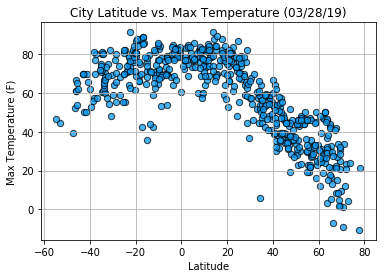

In [6]:
ts = time.gmtime()
today_date = time.strftime("%x", ts)
chart1 = plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({today_date})")

#### Latitude vs. Humidity Plot

Text(0.5,1,'City Latitude vs. Humidity (03/28/19)')

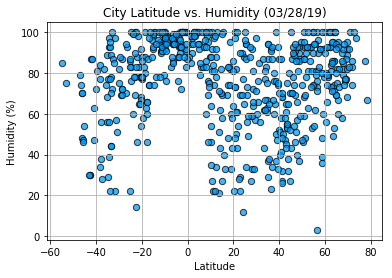

In [7]:
chart2 = plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({today_date})")

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'City Latitude vs. Cloudiness (03/28/19)')

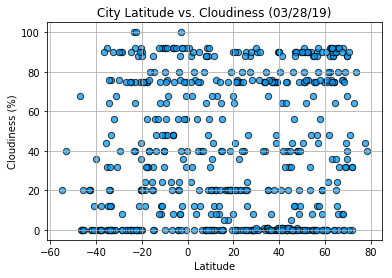

In [8]:
chart3 = plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({today_date})")

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'City Latitude vs. Wind Speed (03/28/19)')

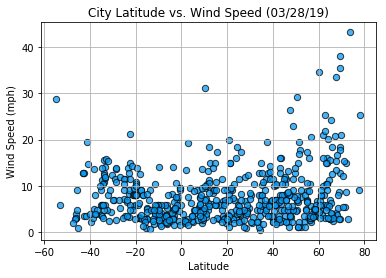

In [9]:
chart4 = plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({today_date})")